In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

from sklearn import tree
from io import StringIO
from IPython.display import Image
import pydotplus

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Load the dataset

In [2]:
AH_data = pd.read_csv("tree_addhealth.csv")
data_clean = AH_data.dropna()

# Split into training and testing sets

In [3]:
predictors = data_clean[['age', 'BIO_SEX', 'GPA1', 'ALCPROBS1']]

targets = data_clean.TREG1
pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

print('pred_train shape:', pred_train.shape)
print('pred_test shape:', pred_test.shape)
print('tar_train shape:', tar_train.shape)
print('tar_test shape:', tar_test.shape)

pred_train shape: (2745, 4)
pred_test shape: (1830, 4)
tar_train shape: (2745,)
tar_test shape: (1830,)


# Build model on training data

In [4]:
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

print('confusion matrix:', sklearn.metrics.confusion_matrix(tar_test,predictions))
print('accuracy score:', sklearn.metrics.accuracy_score(tar_test, predictions))

confusion matrix: [[1336  186]
 [ 243   65]]
accuracy score: 0.765573770492


# Displaying the decision tree

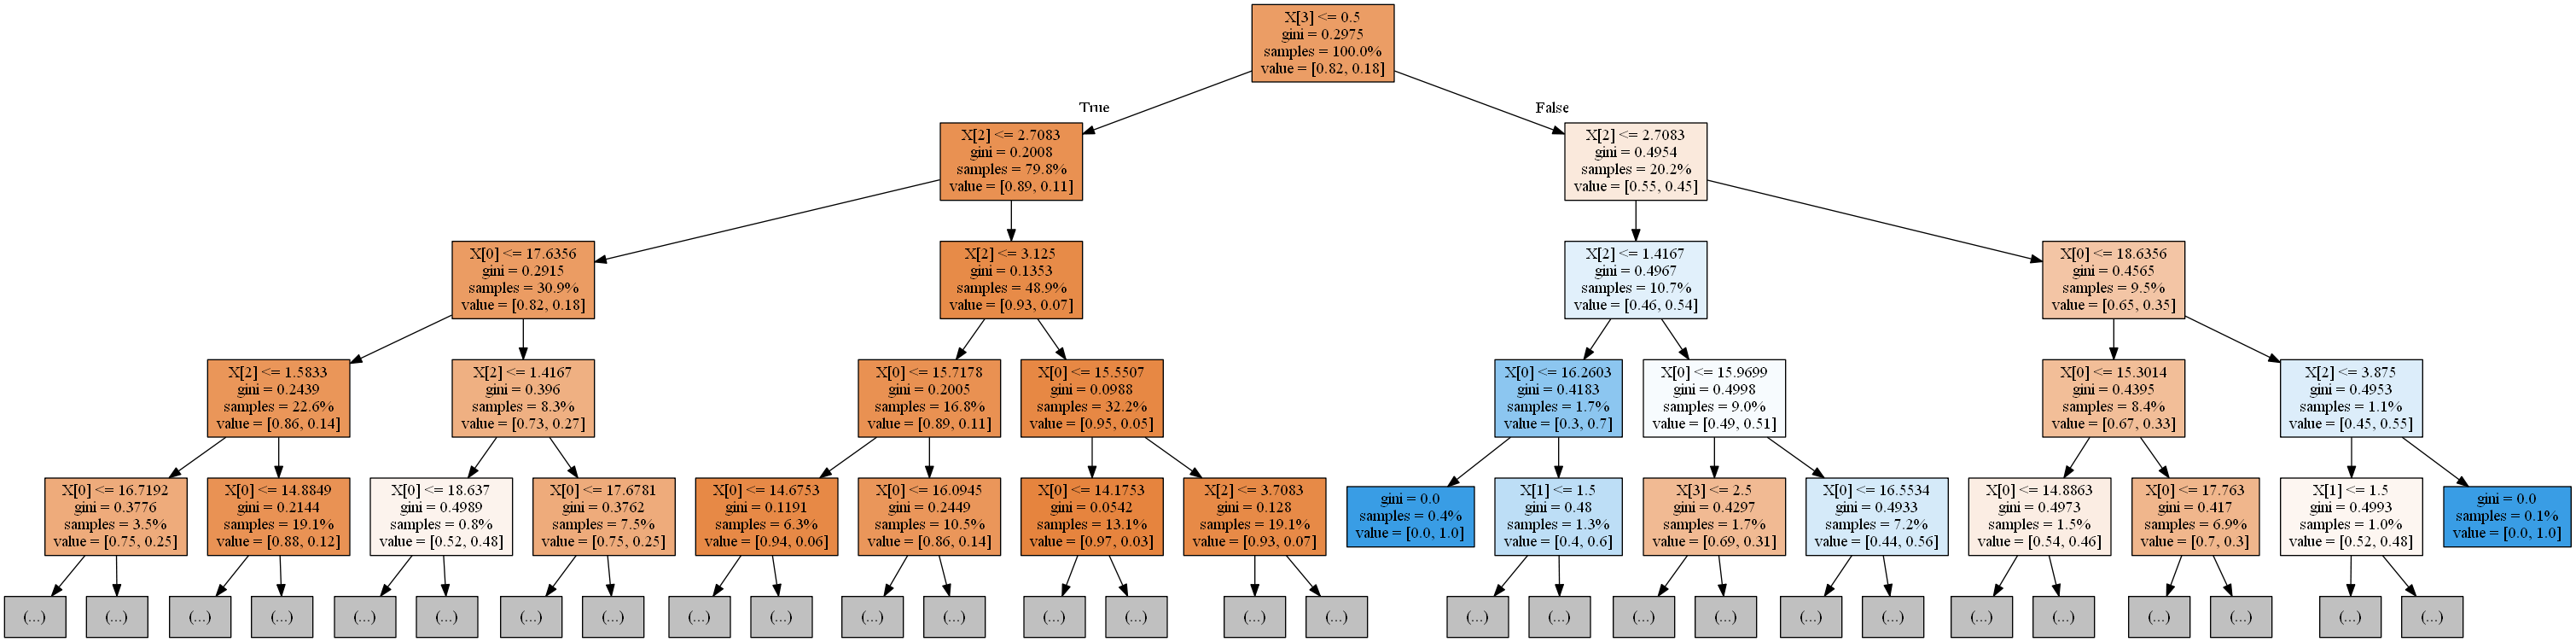

In [5]:
out = StringIO()
tree.export_graphviz(classifier, out_file=out, proportion=True, filled=True, max_depth=4)
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())